# 일변량 비시각화

#### 사전 데이터 탐색
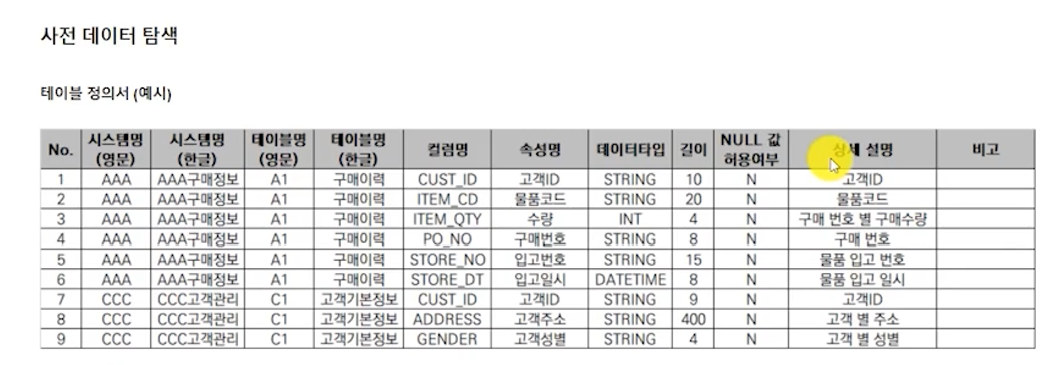
* 테이블 내 존재하는 데이터들의 기본 정보 확인을 위한 관리 체계
* 변수 (컬럼) 별 컬럼명, 속성명, 타입, 길이, NULL 허용여부 등 정보 확인

In [1]:
import numpy as np
import pandas as pd

In [6]:
# 실습활용을 위한 sklearn 패키지 내 보스턴 주택가격 데이터 로딩
# sklearn 상위버전(1.2 이상)에서 데이터 셋을 더이상 제공하지 않음
# from sklearn.datasets import 'load_boston'
# with warnings.catch_warnings():
#     warnings.fillterwarnings('ignore')
#     data = load_boston()

# 상위 버전 이용 시 sklearn 참고 페이지 내 코드 실행하여 데이터 로딩
# data 및 target을 Dataframe으로 생성후 추후 merge

data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url,sep='\s+', skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
housing = pd.merge(pd.DataFrame(data), pd.DataFrame(target), left_index = True, right_index = True, how='inner')
housing.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
housing.to_csv('../data/housing.csv', sep=',', index=False)

In [11]:
data = pd.read_csv('../data/housing.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
# 데이터 프레임 생성 및 Merge (load_boston() 으로 data 받은경우 data, target이 나눠져 있기 때문에)
# 나는 직접 html로 받아서 이미 합쳐져 있어서 할 필요는 없지만, 주석으로 남겨둔다
# X = pd.DataFrame(data.data, columns = data.feature_names)
# y = pd.DataFrame(data.target, columns = ['MEDV'])
# housing = pd.merge(X, y, left_index=True, right_index = True, how = 'inner')

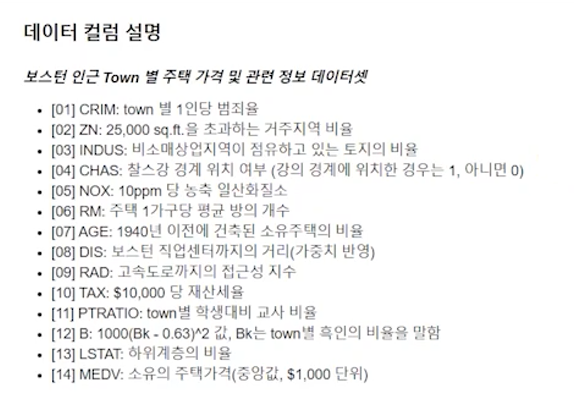

#### 데이터 개요 및 결측치, 구성 확인

In [19]:
# 데이터 copy
housing_data = data.copy()

# 개요 
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


* 모든 data 가 float64
* 사전 데이터 Description 내 CHAS 는 카테코리 변수라 정의 >> 분석 단계 시 변경 필요

In [20]:
# 데이터 head 확인
housing_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [21]:
# 데이터 tail 확인
housing_data.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


* head 및 tail을 확인 시, 데이터 형상이 유사하게 나타남

In [27]:
# 일부 데이터 범위 확인
print(housing_data.MEDV.describe())
housing_data.AGE.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

### 범주형 일변량 비시각화

In [28]:
# 데이터 설명에 따라 CHAS 컬럼을 범주형 데이터로 변환
housing_data = housing_data.astype({'CHAS':'object'})
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), object(1)
memory usage: 55.5+ KB


In [35]:
# 범주형 데이터 빈도표
pd.crosstab(housing_data.CHAS, columns='count')

col_0,count
CHAS,
0.0,471
1.0,35


* 각 경계에 있지 않은 town 471개 지역, 경계에 위치한 town이 35개 지역으로 차이를 보임

In [36]:
# 비율 환산
pd.crosstab(housing_data.CHAS, columns ='count', normalize=True)

col_0,count
CHAS,
0.0,0.93083
1.0,0.06917


In [38]:
# 합 추가하기 -> 각 record별 컬럼들 변수 합 및 각 column 별 변수 합 
pd.crosstab(housing_data.CHAS, columns='count', margins=True)

col_0,count,All
CHAS,,
0.0,471,471
1.0,35,35
All,506,506


In [39]:
# 비율 값으로 합 추가하기
pd.crosstab(housing_data.CHAS, columns='count', margins=True, normalize=True)

col_0,count,All
CHAS,,
0.0,0.93083,0.93083
1.0,0.06917,0.06917
All,1.00000,1.00000


* 단순 일변량의 구성을확인하기에 간단한 함수로 활용 가능

### 연속형 일반량 비시각화

In [40]:
housing_data = data.copy()

In [42]:
# 데이터 설명에 따라 CHAS 컬럼을 범주형으로 변환
housing_data = housing_data.astype({'CHAS':'object'})
# 기술통계량 및 4분위수 도출
housing_data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [44]:
# 4분위수 기반의 IQR 연산, Interquartile Range(사분 범위)
# 중위 50% 데이터 범위 길이
q1=housing_data['CRIM'].quantile(0.25)
q3=housing_data['CRIM'].quantile(0.75)
iqr = q3-q1
print('q1: ', q1)
print('q3: ', q3)
print('iqr: ', iqr)

# q1과 q2 대비 q3값이 매우 높다. 즉 데이터의 분포가 왼쪽으로 치우쳐져있고
# 오른쪽 꼬리가 길게 빠진 형태임을 예상할 수 있다. 

q1:  0.08204499999999999
q3:  3.6770825
iqr:  3.5950375


#### 왜도 첨도 확인
* 왜도(SKewness): 분포의 비대칭성을 나타내는 척도로 얼마나 비대칭인지를 확인<br>
    -> 왜도의 경우 값이 0보다 크면 왼쪽으로 치우치고, 오른쪽 꼬리가 긴 형태의 분포를 보임<br>
    
* 첨도(Kurtosis): 분포의 뾰족한 정도를 나타내는 척도로, 평균에 관측치가 얼마나 모여있는지를 확인<br>
    -> 첨도의 경우 값이 0보다 크면 뾰족한 모양을 지님

In [46]:
# 왜도 및 첨도 확인
print('skewness', round(housing_data['CRIM'].skew(), 4))
print('kurtosis', round(housing_data['CRIM'].kurt(), 4))

skewness 5.2231
kurtosis 37.1305


* CRIM 컬럼의 왜도 첨도 확인 결과, 왼쪽으로 치우치고 정규분포보다 훨씬 뾰족한 모양으로 분포를 지닌 변수임을 확인

In [47]:
print('skewness', round(housing_data['MEDV'].skew(), 4))
print('kurtosis', round(housing_data['MEDV'].kurt(), 4))

skewness 1.1081
kurtosis 1.4952


* MEDV 컬럼의 왜도 첨도 확인 결과, 왜도 첨도는 비교적 높지 않은 변수임을 확인

In [50]:
# 연속형 데이터의 비대칭을 처리하여 모델링 적용을 하기위한 방안
# 왜도 첨도의 정도가 심한 변수의 로그 변환
print('skewneess_log: ', round(np.log(housing_data['CRIM']).skew(), 4))
print('kurtosis_log: ', round(np.log(housing_data['CRIM']).kurt(), 4))

skewneess_log:  0.4059
kurtosis_log:  -1.0097


* 로그 변환 결과, 왜도 및 첨도의 정도가 크게 줄어들었음을 확인
* 극단적 분포를 지닌 원 데이터를 알고리즘에 적용하는 것보다, 로그 변환 등의 변환 후 적용하는 것이 정확한 분석 결과를 얻을 수 있음

### Pandas-Profiling 패키지 소개

#### Pandas_Profiling은 기본 EDA를 자동화하여 리포트를 생성하는 패키지
* 데이터 head, tail 및 결측치
* 범주형 및 연속형 변수의 주요 통계량 도출
* 시각화까지 제공

In [54]:
import pandas_profiling
from pandas_profiling import ProfileReport

* Overview: 데이터 개요 확인
    - 컬럼 수, 데이터 관측치 수, 결측치 수, 중복 데이터 행, 컬럼 타입 별 개수 등의 정보 확인
* Variable: 각 컬럼 별 타입 및 정보 확인
    - 고유값 개수(Unique한 데이터)
    - 연속형의 경우 평균, 최대, 최소 및 Quantile statistics 및 왜도 첨도 등 주요 통계량 확인
    - 범주형의 경우 범주 별 빈도 및 비용 확인
* Interactions, Coreelations: 두 개의 변수 간 상관관계 확인
* Missing values: 결측치 확인
* Sample: data의 head 및 tail 확인

In [59]:
# housing_data.profile_report()

In [58]:
# 프로파일링 결과 html을 파일로 저장
# housing_data.profile_report().to_file('../data/housing_data_pr_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Pandas Profiling 의 특징 요약
* 간단한 코드 구현으로, 데이터의 대부분 정보 확인 가능
* 의사결정을 위한, 리포트를 자동으로 생성하여 업무 활용 가능
* 다만, 큰 데이터를 대상으로 실행 시 데이터 요약 및 리포트 생성에 오랜 시간이 소요됨
* 큰 데이터를 대상으로 사용을 고려할 시, 적절하게 추출한 샘플데이터를 대상으로 전체적인 데이터 흐름만 살표보는 방안을 고려 가능